In [3]:
!pip install pyarrow

     |████████████████████████████████| 39.0 MB 139 kB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [3]:
import os
cwd = os.getcwd()
cwd

'/home/igmendozac/MLOps_ZoomCamp/notebooks'

In [4]:
def read_dataframe(filename):
    
    df = pd.read_parquet(filename)

    df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df["duration"] = df["duration"].apply(lambda td: td.total_seconds()/60)

    df = df[(df.duration >=1) & (df.duration <=60)]

    df[categorical] = df[categorical].astype(str)
    
    return df

In [5]:
df_train = read_dataframe("/home/igmendozac/MLOps_ZoomCamp/data/yellow_tripdata_2022-01.parquet")
df_val = read_dataframe("/home/igmendozac/MLOps_ZoomCamp/data/yellow_tripdata_2022-02.parquet")

NameError: name 'categorical' is not defined

In [ ]:
len(df_train), len(df_val)

In [ ]:
categorical = ["PULocationID","DOLocationID"]
numerical = ["trip_distance"]

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient = "records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient = "records")
X_val = dv.transform(val_dicts)

In [ ]:
target = "duration"
y_train = df_train[target].values
y_val = df_val[target].values

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val,y_pred, squared=False)

In [ ]:
la = Lasso(alpha=0.001)
la.fit(X_train,y_train)

y_pred = la.predict(X_val)

mean_squared_error(y_val,y_pred, squared=False)

In [ ]:
lg = Ridge(alpha=0.001)
lg.fit(X_train,y_train)

y_pred = lg.predict(X_val)

mean_squared_error(y_val,y_pred, squared=False)

/home/igmendozac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/igmendozac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


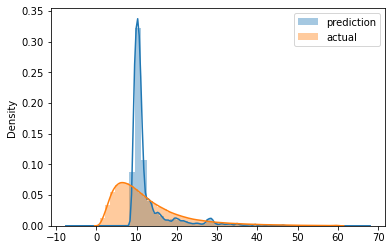

In [102]:
sns.distplot(y_pred, label = "prediction")
sns.distplot(y_train, label = "actual")

plt.legend();